# 04. Definiendo qué es la popularidad

### Algunas cosas para leer

#### ¿Qué es un boxplot?
https://datavizcatalogue.com/ES/metodos/diagrama_cajas_y_bigotes.html

#### ¿Qué es un diagrama de violín?
https://datavizcatalogue.com/ES/metodos/diagrama_de_violin.html


## Importamos paquetes necesarios

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import chart_utils as acu

## ¿Qué hace popular a una cerveza?

### Análisis general de la cantidad de revisiones

In [2]:
file_cervezas_unicas_resumen_valores = 'dataset/cervezas_unicas_resumen_valores.csv'

df = pd.read_csv(file_cervezas_unicas_resumen_valores)
df.head()

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,cantidad_revisiones,revision_primera,revision_ultima,edad,disponibilidad
0,47986,Sausa Weizen,10325,Vecchio Birraio,Hefeweizen,5.0,1.5,2.0,2.5,1.5,1.5,1,2009-02-16,2009-02-16,3,1
1,48213,Red Moon,10325,Vecchio Birraio,English Strong Ale,6.2,3.0,2.5,3.0,3.0,3.0,1,2009-03-01,2009-03-01,3,1
2,48215,Black Horse Black Beer,10325,Vecchio Birraio,Foreign / Export Stout,6.5,3.0,2.5,3.0,3.0,3.0,1,2009-03-01,2009-03-01,3,1
3,47969,Sausa Pils,10325,Vecchio Birraio,German Pilsener,5.0,3.0,3.0,3.5,2.5,3.0,1,2009-02-15,2009-02-15,3,1
4,64883,Cauldron DIPA,1075,Caldera Brewing Company,American Double / Imperial IPA,7.7,4.0,4.5,4.0,4.0,4.5,1,2010-12-30,2010-12-30,2,1


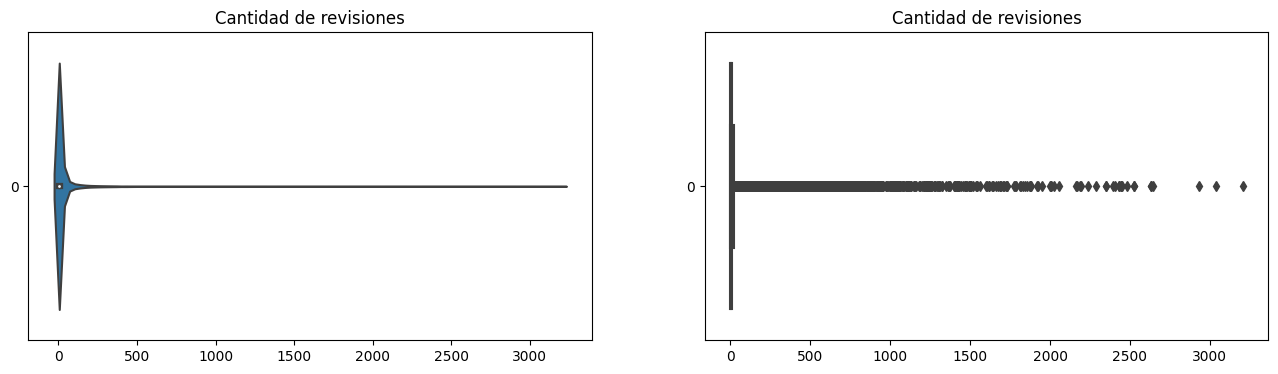

In [3]:
acu.plot_boxplot_violin(df['cantidad_revisiones'],  'Cantidad de revisiones')

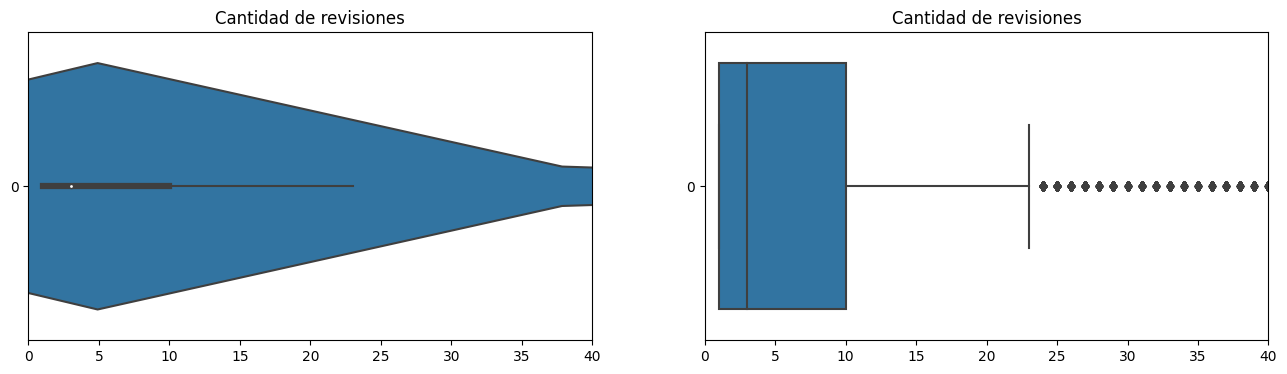

In [19]:
acu.plot_boxplot_violin(df['cantidad_revisiones'],  'Cantidad de revisiones', min_=-0, max_=40)

In [4]:
min_rev = min(df['cantidad_revisiones'])
q1_rev = np.quantile(df['cantidad_revisiones'], .25)
q2_rev = np.quantile(df['cantidad_revisiones'], .50)
q3_rev = np.quantile(df['cantidad_revisiones'], .75)
max_rev = max(df['cantidad_revisiones'])
ri_rev = q3_rev - q1_rev
pd.DataFrame(
    {
        'Titulo' : ['Minima cantidad de revisiones', 'Q1 (25%)', 'Q2 (50%)', 'Q3 (75%)','Bigote superior (Q3 + 1.5 RI)', 'Maxima cantidad de revisiones'],
        'Valores' : [
            str(min_rev),
            str(round(q1_rev, 3)),
            str(round(q2_rev, 3)),
            str(round(q3_rev, 3)),
            str(round(q3_rev + 1.5*ri_rev, 3)),
            str(max_rev)
        ]
    }
)


,Titulo,Valores
0,Minima cantidad de revisiones,1
1,Q1 (25%),1.0
2,Q2 (50%),3.0
3,Q3 (75%),10.0
4,Bigote superior (Q3 + 1.5 RI),23.5
5,Maxima cantidad de revisiones,3206


In [15]:
cantidad_revisiones = df['cantidad_revisiones']

percentiles = []
valores = []
catas = []
nro_cervezas_por_encima = []
nro_cervezas_por_debajo = []
perc = []

total_cervezas = len(df)

for q in range(0,101, 1):
    p = q/100
    percentiles.append(q)
    
    quantile = np.quantile(cantidad_revisiones, p)
    valores.append(round(quantile, 2))
    
    nro_catas = quantile
    catas.append(nro_catas)
    
    cervezas_por_encima = len(df[df['cantidad_revisiones']>=nro_catas])
    cervezas_por_debajo = total_cervezas - cervezas_por_encima
    nro_cervezas_por_encima.append(str(cervezas_por_encima))
    nro_cervezas_por_debajo.append(str(cervezas_por_debajo))
    
    perc.append(str(round(cervezas_por_encima/total_cervezas * 100, 2)) + ' %')
    
tmp_df = pd.DataFrame(
    {
        'Percentil' : percentiles,
        'Catas' : catas,
        'Nro cervezas ↓' : nro_cervezas_por_debajo,
        'Nro cervezas ↑' : nro_cervezas_por_encima,
        '% ↑': perc
    }
)

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(tmp_df)

     Percentil   Catas Nro cervezas ↓ Nro cervezas ↑      % ↑
0            0     1.0              0          49011  100.0 %
1            1     1.0              0          49011  100.0 %
2            2     1.0              0          49011  100.0 %
3            3     1.0              0          49011  100.0 %
4            4     1.0              0          49011  100.0 %
5            5     1.0              0          49011  100.0 %
6            6     1.0              0          49011  100.0 %
7            7     1.0              0          49011  100.0 %
8            8     1.0              0          49011  100.0 %
9            9     1.0              0          49011  100.0 %
10          10     1.0              0          49011  100.0 %
11          11     1.0              0          49011  100.0 %
12          12     1.0              0          49011  100.0 %
13          13     1.0              0          49011  100.0 %
14          14     1.0              0          49011  100.0 %
15      

In [16]:
round(tmp_df[tmp_df['Percentil'] == 95].Catas.values[0], 2)

134.0

#### Asignamos la clase al dataset principal

In [17]:
cuantil_elegido = 95
umbral = tmp_df[tmp_df['Percentil'] == cuantil_elegido].Catas.values[0]

df_cervezas_unicas_resumen_valores_con_clase = df.copy()

df_cervezas_unicas_resumen_valores_con_clase['es_popular'] = np.where(
    df_cervezas_unicas_resumen_valores_con_clase['cantidad_revisiones']>umbral, 'SI', 'NO')

df_cervezas_unicas_resumen_valores_con_clase.head()

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,cantidad_revisiones,revision_primera,revision_ultima,edad,disponibilidad,es_popular
0,47986,Sausa Weizen,10325,Vecchio Birraio,Hefeweizen,5.0,1.5,2.0,2.5,1.5,1.5,1,2009-02-16,2009-02-16,3,1,NO
1,48213,Red Moon,10325,Vecchio Birraio,English Strong Ale,6.2,3.0,2.5,3.0,3.0,3.0,1,2009-03-01,2009-03-01,3,1,NO
2,48215,Black Horse Black Beer,10325,Vecchio Birraio,Foreign / Export Stout,6.5,3.0,2.5,3.0,3.0,3.0,1,2009-03-01,2009-03-01,3,1,NO
3,47969,Sausa Pils,10325,Vecchio Birraio,German Pilsener,5.0,3.0,3.0,3.5,2.5,3.0,1,2009-02-15,2009-02-15,3,1,NO
4,64883,Cauldron DIPA,1075,Caldera Brewing Company,American Double / Imperial IPA,7.7,4.0,4.5,4.0,4.0,4.5,1,2010-12-30,2010-12-30,2,1,NO


In [61]:
df_cervezas_unicas_resumen_valores_con_clase.groupby(by=['es_popular']).size().reset_index(name='counts')

,es_popular,counts
0,NO,46552
1,SI,2459


In [60]:
file_cervezas_unicas_resumen_valores_con_clase = 'dataset/cervezas_unicas_resumen_valores_con_clase.csv'
df_cervezas_unicas_resumen_valores_con_clase.to_csv(file_cervezas_unicas_resumen_valores_con_clase, index=False)